<h1> Data Analytics - II : Logistic Regression</h1>

<h4> Problem Statement </h4>
<h5> 1. Implement logistic regression using Python/R to perform
classification on
Social_Network_Ads.csv dataset.<br>
2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision,
Recall on the given dataset.</h5>

In [1]:
#imports 
import numpy as np
import pandas as pd
import seaborn as sns 
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
data = pd.read_csv("Social_Network_Ads.csv")

In [3]:
data.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
155,15610140,Female,31.0,15000.0,0
302,15720745,Female,37.0,137000.0,1
345,15716781,Female,41.0,63000.0,0
147,15749130,Female,41.0,30000.0,0
77,15774179,Female,22.0,27000.0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           400 non-null    object 
 2   Age              400 non-null    float64
 3   EstimatedSalary  400 non-null    float64
 4   Purchased        400 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 15.8+ KB


In [5]:
data.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

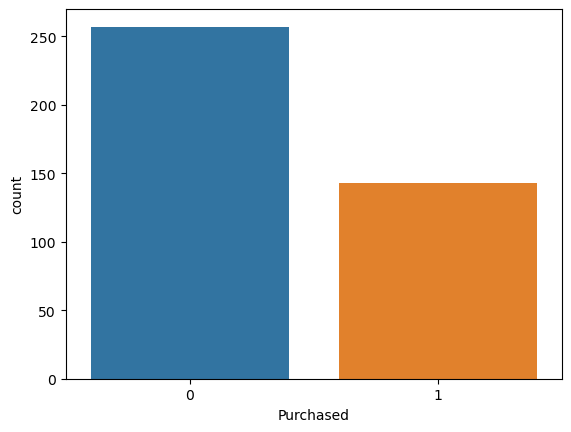

In [6]:
# Target label : 'Purchased'
sns.countplot(data = data, x = 'Purchased');

<Axes: >

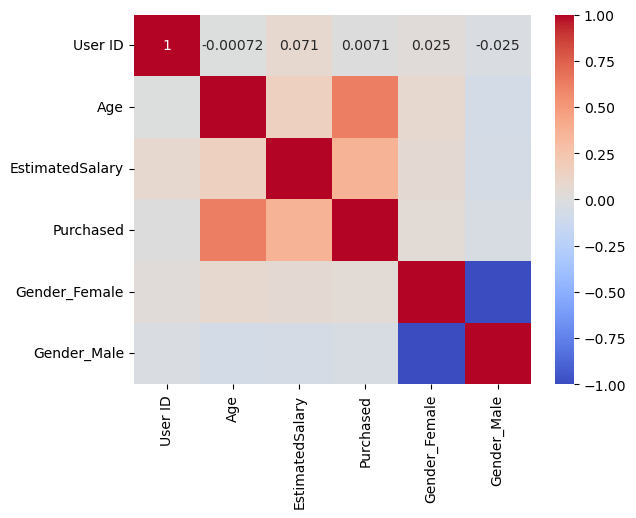

In [16]:
# Assuming 'Gender' is the non-numeric column
data_encoded = pd.get_dummies(data, columns=['Gender'])  # One-hot encode 'Gender' column
sns.heatmap(data_encoded.corr(), annot=True, cmap='coolwarm')

In [8]:
features = data[['Age', 'EstimatedSalary']]
label = data['Purchased']

In [ ]:
scaler = StandardScaler()
features = scaler.fit_transform(features)

In [9]:
x = features
y = label

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Model

In [11]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

### Prediction

In [12]:
y_pred = model.predict(x_test)

In [13]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

### Evaluation

<Axes: >

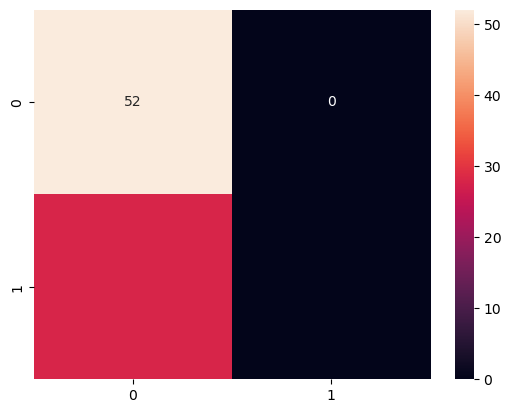

In [14]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot= True)

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79        52
           1       0.00      0.00      0.00        28

    accuracy                           0.65        80
   macro avg       0.33      0.50      0.39        80
weighted avg       0.42      0.65      0.51        80

